In [200]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
# mlxtend - http://rasbt.github.io/mlxtend/
# scikit plot - http://scikit-plot.readthedocs.io/en/stable/index.html
%matplotlib inline

Automatically created module for IPython interactive environment


In [215]:
# create a x variable with 2 columns and size 100
X = np.random.randint(100, size=(100, 3))
# create a x variable with 2 columns and size 100
y = np.random.randint(100, size=(100, 1))

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [203]:
# Create linear regression object
regr = linear_model.LinearRegression()


In [204]:

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


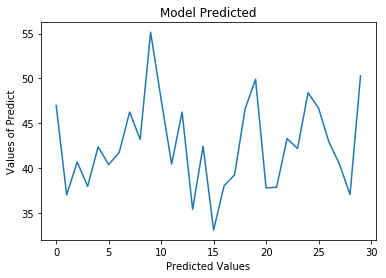

In [205]:
plt.plot(y_pred)
plt.ylabel("Values of Predict")
plt.xlabel("Predicted Values")
plt.title("Model Predicted");

In [206]:

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# Show the parameter of model
print('Parâmetros do Modelo:')
print(regr.get_params())


Coefficients: 
 [[ 0.14894943  0.09798396  0.11842623]]
Mean squared error: 836.97
Variance score: -0.06
Parâmetros do Modelo:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


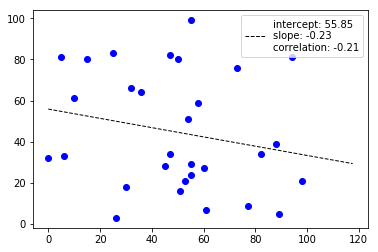

In [207]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_linear_regression
import numpy as np

X_ = np.array(X_test[:, 0])
y_ = np.array(y_test[:,0])


intercept, slope, corr_coeff = plot_linear_regression(X_, y_)

plt.show();

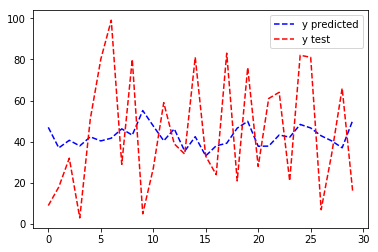

In [208]:
fig, ax = plt.subplots()
ax.plot(y_pred, 'b--', label='y predicted')
ax.plot(y_test, 'r--', label='y test')
ax.legend(loc=1);

In [209]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
ridge = linear_model.Ridge (alpha = .5)
sgd = linear_model.SGDRegressor()
logistic = linear_model.LogisticRegression()

In [210]:
regression = [regr, ridge, sgd, logistic]

In [211]:
[x.fit(X,y) for x in regression]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)]

In [212]:
y_pred = [x.predict(X_test) for x in regression]

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
for x in y_pred:
    print('R2 Score:%.3f' % r2_score(y_test, x, multioutput='raw_values'))

R2 Score:0.084
R2 Score:0.084
R2 Score:-15405084189480938635264.000
R2 Score:-0.228


In [218]:
from sklearn import linear_model


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', linear_model.LogisticRegression()))
models.append(('LMR', linear_model.LinearRegression()))
models.append(('RIDGE', linear_model.Ridge (alpha = .5)))
models.append(('SGD', linear_model.SGDRegressor()))

In [230]:
from sklearn.model_selection import cross_val_score, KFold

# evaluate each model in turn
results = []
names = []
scoring = 'lasso'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.000000 (0.000000)
LMR: -0.319650 (0.468414)
RIDGE: -0.319646 (0.468408)
SGD: -320789754065630659608576.000000 (368221758606308066459648.000000)


In [259]:
from sklearn.model_selection import cross_val_score, KFold

# evaluate each model in turn
results = []
names = []
scoring = 'lasso'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = model.fit(X_train, y_train.ravel())
	results.append(model.predict(X_test))
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.score(X, y), cv_results.score(X, y).std())
	print(msg)

LR: 0.140000 (0.000000)
LMR: 0.080594 (0.000000)
RIDGE: 0.080594 (0.000000)
SGD: -631106303509595542257664.000000 (0.000000)


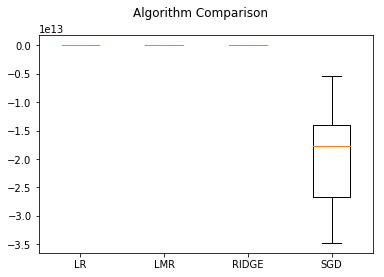

In [260]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()